In [57]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df =pd.read_excel("/E-com_Data.xlsx",header=0)

In [4]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
df.shape

(537979, 12)

Look here i want to cluster my data based on price(consumer spending amount) and frequency of buying. So, it is obivious that variables(Time, shipping Location,Cancelled_status,Reason of return and Sold as set) are not going to help me. So, as of now i am going to drop last 3 variables and i will also drop other unnecessary variables once i will complete checking duplicate values.


In [16]:
df = df.drop(["Cancelled_status","Reason of return","Sold as set"],axis=1)

In [ ]:
# It is always good practice to check changes that you have applied.
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [ ]:
df.duplicated().sum()

9

As we have observed 9 duplicate values, i am going to drop that 9 rows.


In [17]:
df.drop_duplicates(keep = "first",inplace=True)

In [ ]:
df.shape

(537970, 9)

now let us check for NA values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537970 entries, 0 to 537978
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          537970 non-null  object        
 2   InvoieNo           537970 non-null  int64         
 3   Date of purchase   537970 non-null  datetime64[ns]
 4   Quantity           537970 non-null  int64         
 5   Time               537970 non-null  object        
 6   price per Unit     537970 non-null  float64       
 7   Price              537970 non-null  float64       
 8   Shipping Location  537970 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 41.0+ MB


Now, we can see that only CustomerID has NA values. Which we are going to drop beacause we will be still left with large amount of data. So that we don't unnecessary create bias by imputing values.

In [19]:
df =df.drop(df[df["CustomerID"].isna()].index)

In [20]:
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price
count,404181.000000,404181.000000,404181.000000,404181.000000,404181.000000
mean,2181.897630,385648.273397,11.478669,341.450009,2474.139920
std,1252.681271,13107.396221,29.489919,427.242005,4891.388347
min,2.000000,361429.000000,-152.000000,2.000000,-10152.000000
25%,1207.000000,374194.000000,2.000000,158.000000,555.000000
50%,2078.000000,386937.000000,5.000000,238.000000,1572.000000
75%,3291.000000,397130.000000,12.000000,407.000000,2492.000000
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000


There are also some negative values in Quantity which shows that customer has returned products. I am dropping that rows as well because it will not affect our purpose of analysis.

In [21]:
df = df.drop(df[df["Quantity"]<0].index)

In [22]:
#checking if there is negative values anymore
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price
count,395998.000000,395998.000000,395998.000000,395998.000000,395998.000000
mean,2186.423482,385683.406209,11.822648,338.627140,2554.930656
std,1252.325963,13107.505659,29.667004,424.303919,4903.426736
min,2.000000,361429.000000,1.000000,2.000000,12.000000
25%,1212.000000,374298.000000,2.000000,157.000000,598.000000
50%,2080.000000,386957.000000,6.000000,237.000000,1608.000000
75%,3294.000000,397157.000000,12.000000,403.000000,2520.000000
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000


Now i have checked duplicate values,NA values. So, i am going to drop remaining unnecessary variables. So that our dataset becomes light and easy to work.





In [23]:
df = df.drop(["Item Code","InvoieNo","Quantity","Time","price per Unit","Shipping Location"],axis=1)

In [24]:
df.head()

,CustomerID,Date of purchase,Price
0,4355.0,2017-10-29,1926.0
1,4352.0,2017-10-05,1740.0
2,4352.0,2017-10-12,1866.0
3,4352.0,2017-08-22,1869.0
4,4352.0,2017-10-10,1888.0


In [25]:
df.shape

(395998, 3)

I need to analyze data based on frequency of customers and its spending but i don't have frequency of customers and its total spending. To get those values i am going to apply groupby function which will help me to get frequency for each customerID and aggregate sum function which will help me to get total spending of a particular customer.

In [26]:
gb= df.groupby(["CustomerID","Date of purchase"]).agg({"Price":["sum"]})


I have applied groupby for both(CustomerID,Date of purchase). So that it considers different purchases on same day as single purchase.



In [27]:
gb.head()

Price
                                 sum
CustomerID Date of purchase         
2.0        2016-12-08        14363.0
           2016-12-09        10722.0
           2016-12-11        14084.0
           2016-12-12         2016.0
           2016-12-13        14618.0

In [28]:
gb.index

MultiIndex([(   2.0, '2016-12-08'),
            (   2.0, '2016-12-09'),
            (   2.0, '2016-12-11'),
            (   2.0, '2016-12-12'),
            (   2.0, '2016-12-13'),
            (   2.0, '2016-12-14'),
            (   2.0, '2016-12-15'),
            (   2.0, '2016-12-16'),
            (   2.0, '2016-12-17'),
            (   2.0, '2017-01-27'),
            ...
            (4372.0, '2017-10-16'),
            (4372.0, '2017-10-17'),
            (4372.0, '2017-10-18'),
            (4372.0, '2017-10-19'),
            (4372.0, '2017-10-20'),
            (4372.0, '2017-10-21'),
            (4372.0, '2017-10-22'),
            (4372.0, '2017-10-30'),
            (4372.0, '2017-11-02'),
            (4372.0, '2017-11-06')],
           names=['CustomerID', 'Date of purchase'], length=115676)

In [29]:
gb.values

array([[14363.],
       [10722.],
       [14084.],
       ...,
       [ 2544.],
       [ 5076.],
       [ 2544.]])

In [31]:
customerID = []
for i in range(len(gb.index)):
    customerID.append(gb.index[i][0])

In [32]:
date=[]
for i in range(len(gb.index)):
    date.append(gb.index[i][1])

In [33]:
price=gb.values

In [34]:
new_df = pd.DataFrame()

In [35]:
new_df["CustomerID"]=customerID
new_df["Date"] = date
new_df["Price"] = price

In [36]:
new_df.head()

,CustomerID,Date,Price
0,2.0,2016-12-08,14363.0
1,2.0,2016-12-09,10722.0
2,2.0,2016-12-11,14084.0
3,2.0,2016-12-12,2016.0
4,2.0,2016-12-13,14618.0


Now, i am going to apply one more time groupby function when i previously applied groupby function it was aiming at considering different purchases on same day as single purchase for a particular customer. New groupby function will create group based on CustomerID. So that it will help me to get frequency of customers and their total spending. 

In [40]:
new_gb = new_df.groupby("CustomerID")

In [41]:
new_gb.head()

,CustomerID,Date,Price
0,2.0,2016-12-08,14363.0
1,2.0,2016-12-09,10722.0
2,2.0,2016-12-11,14084.0
3,2.0,2016-12-12,2016.0
4,2.0,2016-12-13,14618.0
...,...,...,...
115653,4372.0,2017-05-23,12786.0
115654,4372.0,2017-05-24,9656.0
115655,4372.0,2017-05-25,18372.0
115656,4372.0,2017-05-26,19296.0


In [42]:
#this will give me frequency count for each customer. 
new_gb.size().values

array([ 63,  18,  10, ...,  10, 132,  23])

Let me create one more dataframe. I will explain purpose of each variable in new dataframe once i have created.

In [44]:
extra_df = pd.DataFrame()

In [45]:
extra_df["CustomerID"] = new_gb.size().index  #this will give me customerID
extra_df["Frequency"] = new_gb.size().values  #this will give me frequency for particular customer
extra_df["Max_Date"] = new_gb["Date"].agg(np.max).values #this will give me last buying date for customer in given data
extra_df["Min_Date"] = new_gb["Date"].agg(np.min).values #this will give me first buying date for customer in given data
extra_df["Price"]=new_gb["Price"].agg(np.sum).values #this will give me total spending of customer.

In [46]:
extra_df.head()

,CustomerID,Frequency,Max_Date,Min_Date,Price
0,2.0,63,2017-12-16,2016-12-08,553704.0
1,3.0,18,2017-10-04,2016-12-19,257404.0
2,4.0,10,2017-12-01,2017-11-22,176613.0
3,5.0,7,2017-02-12,2017-02-03,41976.0
4,6.0,41,2017-11-13,2017-02-17,166972.0


I have created new dataframe because i wanted to know how long(time period) customer is buying.
reason to do so that is to know true regular customers. For example suppose one customer has bought all days in a starting month of a year.Let say starting month is january and customer has bought items all days of january month.It will give me frequency count of 31(as january has 31 days). But can i say he is my regular customer if he has never visited store after first month in that year ? I can't consider him regular customer and that's why i need both frequency count and time period to know true regular customers. I will get time period by substracting Min_Date from Max_Date.

In [48]:
extra_df["Time Period"] = (extra_df["Max_Date"]-extra_df["Min_Date"])/np.timedelta64(1,"D")

In [49]:
extra_df.head()

,CustomerID,Frequency,Max_Date,Min_Date,Price,Time Period
0,2.0,63,2017-12-16,2016-12-08,553704.0,373.0
1,3.0,18,2017-10-04,2016-12-19,257404.0,289.0
2,4.0,10,2017-12-01,2017-11-22,176613.0,9.0
3,5.0,7,2017-02-12,2017-02-03,41976.0,9.0
4,6.0,41,2017-11-13,2017-02-17,166972.0,269.0


I am going to divide Time Period by 365(1 year) so that i can get relative time period.
I will also create one feature which will be multiplication of new created Time Period and frequency.Purpose of doing that it will combine both individual variables into single variable. That variable we will utilize in our model with Price variable. So at the end we will have only two variables and we can easily visualize data in 2D. This new combine variable will have less value if i have less value for either of two individual variables(which shows that my customer is not much important according to combine variable) and  my combine variable has higher value if both my individual variables have high values(which shows that my customer is important according to combine variable).

In [50]:
extra_df["Time Period"] = extra_df["Time Period"]/365

In [51]:
extra_df.head()

,CustomerID,Frequency,Max_Date,Min_Date,Price,Time Period
0,2.0,63,2017-12-16,2016-12-08,553704.0,1.021918
1,3.0,18,2017-10-04,2016-12-19,257404.0,0.791781
2,4.0,10,2017-12-01,2017-11-22,176613.0,0.024658
3,5.0,7,2017-02-12,2017-02-03,41976.0,0.024658
4,6.0,41,2017-11-13,2017-02-17,166972.0,0.736986


In [52]:
extra_df["Combine Vaiable"] = (extra_df["Time Period"])*(extra_df["Frequency"])

In [53]:
extra_df.head()

,CustomerID,Frequency,Max_Date,Min_Date,Price,Time Period,Combine Vaiable
0,2.0,63,2017-12-16,2016-12-08,553704.0,1.021918,64.380822
1,3.0,18,2017-10-04,2016-12-19,257404.0,0.791781,14.252055
2,4.0,10,2017-12-01,2017-11-22,176613.0,0.024658,0.246575
3,5.0,7,2017-02-12,2017-02-03,41976.0,0.024658,0.172603
4,6.0,41,2017-11-13,2017-02-17,166972.0,0.736986,30.216438


In [54]:
final_df = extra_df.drop(["Frequency","Max_Date","Min_Date","Time Period"],axis=1)

In [55]:
final_df.head()

,CustomerID,Price,Combine Vaiable
0,2.0,553704.0,64.380822
1,3.0,257404.0,14.252055
2,4.0,176613.0,0.246575
3,5.0,41976.0,0.172603
4,6.0,166972.0,30.216438


In [71]:
final_df.rename(columns = {'Combine Vaiable':'Combine Variable'}, inplace = True)


One last step remaining before we apply KMeans algorithm and that is checking outliers because KMeans algorithm get affected by outliers.

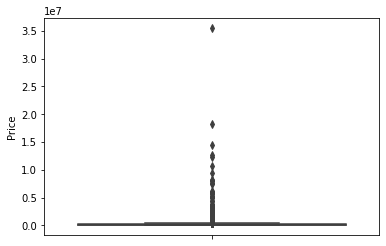

In [66]:
sns.boxplot(y=final_df["Price"])

Very wide range of Price. Let me reduce that range so that we can visualize boxplot very well. 

In [67]:
final_df["Price"] = np.sqrt(final_df["Price"])

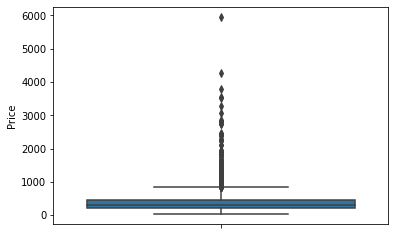

In [68]:
sns.boxplot(y=final_df["Price"])

There are many extreme values. We can not remove them.Let me bring very extreme values to 3000.

In [70]:
final_df.loc[final_df[final_df["Price"]>3000].index,["Price"]] =3000

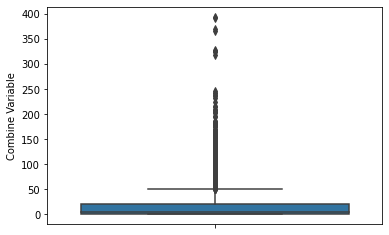

In [72]:
sns.boxplot(y=final_df["Combine Variable"])

There are many extreme values.We can not remove them. Let me bring very extreme values to 250.

In [89]:
final_df.loc[final_df[final_df["Combine Variable"]>250].index,["Combine Variable"]] = 250

In [90]:
X = final_df.iloc[:,[1,2]]

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

Let us build model now.

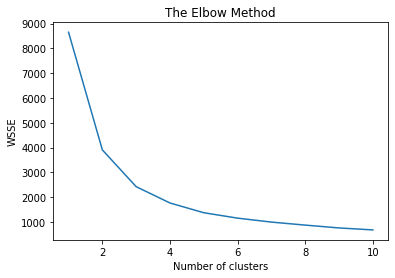

In [92]:
from sklearn.cluster import KMeans

wsse=[]
for i  in range(1,11):
     kmeans = KMeans(n_clusters=i,random_state =10)
     kmeans.fit(X)
     wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSSE")
plt.show()

cluster values 3 & 4 seem more appropriate. Let us check both one by one.

clusters =3

In [93]:
kmeans = KMeans(n_clusters=3,random_state =10)
y_pred= kmeans.fit_predict(X)

In [94]:
final_df["clusters3"] = y_pred

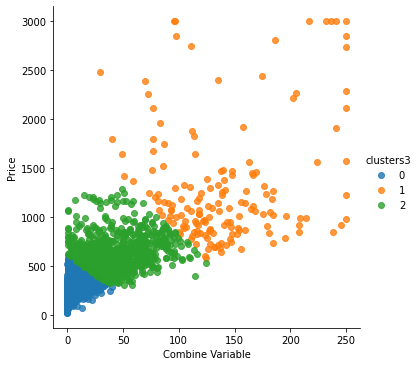

In [95]:
sns.lmplot(data=final_df,x="Combine Variable",y="Price",fit_reg=False,hue="clusters3")

clusters =4

In [96]:
kmeans = KMeans(n_clusters=4,random_state =10)
y_pred= kmeans.fit_predict(X)

In [97]:
final_df["clusters4"] = y_pred

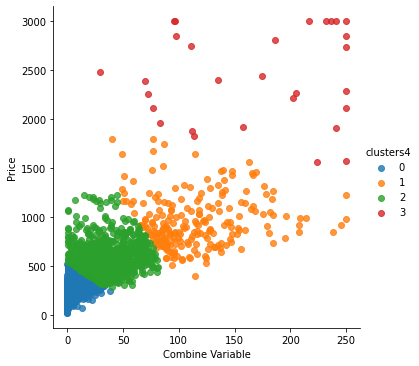

In [98]:
sns.lmplot(data=final_df,x="Combine Variable",y="Price",fit_reg=False,hue="clusters4")

It seems that clusters =4 will make more sense.

*   cluster 0 = less frequency & less spending (Not of our interest)
*   cluster 2 = medium frequency & medium spending (Not of our interest)
*   cluster 1 = high frequency & high spending (That is of our interest)
*   cluster 3 = very high frequency & very high spending (That is of our interest). 






In [100]:
result_df = final_df.loc[:,["CustomerID","clusters4"]]

In [101]:
result_df.head()

,CustomerID,clusters4
0,2.0,2
1,3.0,2
2,4.0,0
3,5.0,0
4,6.0,2


In [104]:
result_df["clusters4"]=result_df['clusters4'].map({0:"Very Less Important",2 : "Less Important", 1 : "Important",3 : "Most Important"})

In [105]:
result_df.head()

,CustomerID,clusters4
0,2.0,Less Important
1,3.0,Less Important
2,4.0,Very Less Important
3,5.0,Very Less Important
4,6.0,Less Important
